# Fitting a Fermi distribution to a quantum dot addition line

A quantum dot addition line shows the energy boundary for adding a new electron from a reservoir into the quantum dot system. A 1D trace measurement across the addition line can be used to extract the electron temperature of the reservoir, by fitting a Fermi distribution to the signal. Note that an accurate electron temperature measurement requires accurate gate-to-dot lever arms ([this example](https://qtt.readthedocs.io/en/latest/notebooks/analysis/example_lever_arm_charging_energy.html) shows how to obtain them), and negligible lifetime broadening (i.e. low dot-reservoir coupling compared to temperature).

This example uses the core function `fitFermiLinear` from `qtt.algorithms.fitting`.

In [1]:
import os
import numpy as np
import scipy

import qcodes
from qcodes.plots.qcmatplotlib import MatPlot
from qcodes.data.data_array import DataArray
import matplotlib.pyplot as plt
%matplotlib inline

import qtt
from qtt.algorithms.fitting import FermiLinear, fitFermiLinear
from qtt.data import load_example_dataset

## Load and plot a sample dataset of a 1D trace across an quantum dot addition line

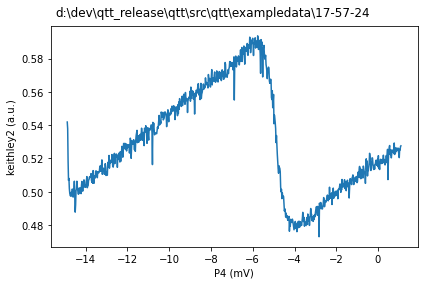

In [2]:
dataset = load_example_dataset('addition_line_scan')
_=MatPlot(dataset.default_parameter_array())

## Fit Fermi function to data

In [3]:
y_array = dataset.default_parameter_array()
setarray = y_array.set_arrays[0]
xdata = np.array(setarray)
ydata = np.array(y_array)
kb = scipy.constants.physical_constants['Boltzmann constant in eV/K'][0]*1e6  # [ueV/K]
la = 100 # [ueV/mV] gate-to-dot lever arm

# fit
pp = fitFermiLinear(xdata, ydata, lever_arm=la/kb, verbose=1, fig=None)
fitted_parameters = pp[0]
initial_parameters = pp[1]['initial_parameters']

y0 = FermiLinear(xdata, *list(initial_parameters))
y = FermiLinear(xdata, *list(fitted_parameters))

print('Estimated electron temperature: %.1f mK' % (1e3 * fitted_parameters[4]))

Estimated electron temperature: 253.9 mK


## Plot the fit to check the accuracy

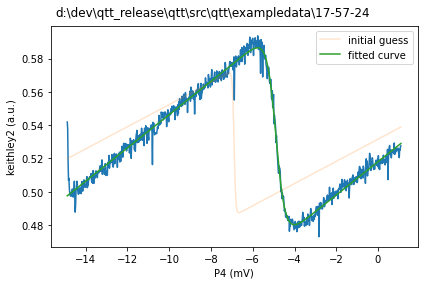

In [4]:
p = MatPlot(dataset.default_parameter_array())
v0 = DataArray(name='initial', label='initial guess', preset_data=y0,  set_arrays=(setarray,))
p.add(v0, alpha=.2, label='initial guess')
v = DataArray(name='fitted', label='fitted curve', preset_data=y,  set_arrays=(setarray,))
p.add(v, label='fitted curve')
_=plt.legend()